In [1]:
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from glob import glob
from hydra import initialize, compose
from lenstronomy.Plots import plot_util

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.plots import overplot, plot
from mejiro.lenses import test
from mejiro.helpers import pyhalo

In [2]:
lens = test.TutorialLens()
model = lens.get_array(num_pix=45, side=4.95)

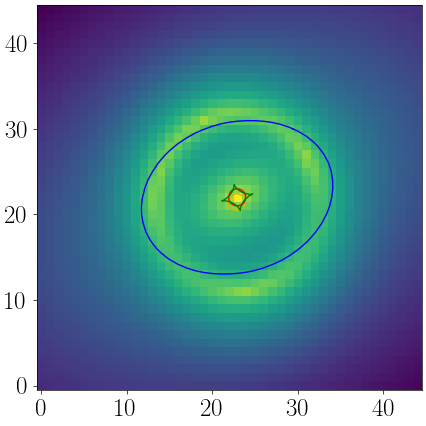

In [3]:
f, ax = plt.subplots(figsize=(5, 5))

ax.imshow(np.log10(model), origin='lower')
overplot.source_position(ax, lens)
overplot.lens_position(ax, lens)
overplot.caustics(ax, lens)
overplot.critical_curves(ax, lens)